In [1]:
#https://www.kaggle.com/datasets/nancyalaswad90/diamonds-prices

In [2]:
import pandas as pd
import urllib.request
from PIL import Image
import seaborn as sns

In [3]:
train = pd.read_csv("DiamondsPrices2022.csv")

In [4]:
# x: length in mm, y: width in mm,z: depth in mm 

In [5]:
{"IF": 7, "VVS1": 6, "VVS2": 5, "VS1": 4, "VS2": 3, "SI1": 2, "SI2": 1, "I1": 0}

{'IF': 7,
 'VVS1': 6,
 'VVS2': 5,
 'VS1': 4,
 'VS2': 3,
 'SI1': 2,
 'SI2': 1,
 'I1': 0}

#Para ver la imagen de la clasificacion de los diamantes
#![imagen](https://www.diamonds.pro/wp-content/uploads/2022/02/Clarity-chart.png)

In [6]:
train.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
train.drop(['Unnamed: 0'], axis=1, inplace=True)
 #ELIMINO el indice adicional

In [8]:
train

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [9]:
train['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [10]:
train['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

### **Otra opcion**

In [16]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse_output=False)
claridad = cat_encoder.fit_transform(train[["clarity"]])

In [17]:
claridad

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [18]:
print(len(cat_encoder.categories_))
print(type(cat_encoder.categories_))

1
<class 'list'>


In [19]:
clarity = pd.DataFrame(claridad)
clarity.columns = list(cat_encoder.categories_[0])

In [20]:
clarity

,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
53938,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53939,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53940,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53941,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [21]:
train = pd.merge(train, clarity, left_index=True, right_index=True)

In [22]:
train

,carat,cut,color,clarity,depth,table,price,x,y,z,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [23]:
train.drop(["cut", "color", "clarity"], axis=1)

,carat,depth,table,price,x,y,z,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53939,0.75,62.2,55.0,2757,5.83,5.87,3.64,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53940,0.71,60.5,55.0,2756,5.79,5.74,3.49,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53941,0.71,59.8,62.0,2756,5.74,5.73,3.43,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [24]:
#x: length in mm, y: width in mm,z: depth in mm 

In [25]:
X = train.drop(["price","cut", "color", "clarity" ], axis=1)
y = train['price'].copy()
X.shape

(53943, 14)

In [26]:
y.shape

(53943,)

In [27]:
X

,carat,depth,table,x,y,z,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,3.89,3.84,2.31,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,4.05,4.07,2.31,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,62.4,58.0,4.20,4.23,2.63,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,63.3,58.0,4.34,4.35,2.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,0.86,61.0,58.0,6.15,6.12,3.74,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53939,0.75,62.2,55.0,5.83,5.87,3.64,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53940,0.71,60.5,55.0,5.79,5.74,3.49,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53941,0.71,59.8,62.0,5.74,5.73,3.43,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [30]:
X_train

,carat,depth,table,x,y,z,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
9159,1.01,60.0,60.0,6.57,6.49,3.92,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14131,1.10,62.5,58.0,6.59,6.54,4.10,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15757,1.50,61.5,65.0,7.21,7.17,4.42,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
24633,1.53,61.3,59.0,7.40,7.35,4.52,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
49831,0.84,64.5,60.0,5.92,5.84,3.79,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1.05,62.4,59.0,6.48,6.51,4.05,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
44732,0.47,61.0,55.0,5.03,5.01,3.06,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
38158,0.33,60.3,58.0,4.49,4.46,2.70,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.90,62.8,59.0,6.13,6.03,3.82,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [31]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (53943, 14)
Train features shape: (43154, 14)
Train target shape: (43154,)
Test features shape: (10789, 14)
Test target shape: (10789,)


In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [33]:
model.fit(X,y)

LinearRegression()

In [34]:
print(model.intercept_)

11106.162943706691


In [35]:
print(model.coef_)

[10524.58237921  -119.81906945   -56.40831208  -889.4484726
    22.08959606   -45.00659177 -3833.53822751  1446.79864768
  -126.155375    -985.80503998   689.97726737   477.65188569
  1152.13714431  1178.93369744]


In [36]:
coeff_df = pd.DataFrame(model.coef_,
                        X.columns,
                        columns=['Coefficient'])
coeff_df

,Coefficient
carat,10524.582379
depth,-119.819069
table,-56.408312
x,-889.448473
y,22.089596
z,-45.006592
I1,-3833.538228
IF,1446.798648
SI1,-126.155375
SI2,-985.805040


In [37]:
X_test

,carat,depth,table,x,y,z,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
1388,0.24,62.1,56.0,3.97,4.00,2.47,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19841,1.21,62.9,54.0,6.78,6.82,4.28,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41647,0.50,61.7,68.0,5.09,5.03,3.12,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
41741,0.50,62.8,56.0,5.06,5.03,3.17,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
17244,1.55,62.3,55.0,7.44,7.37,4.61,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45518,0.53,62.3,55.0,5.20,5.17,3.23,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30056,0.41,61.3,60.0,4.75,4.81,2.93,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
43748,0.51,62.4,58.0,5.11,5.12,3.19,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4998,1.08,63.2,59.0,6.40,6.57,4.10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [38]:
predictions = model.predict(X_test)
predictions

array([ 630.6518361 , 7663.45337568,  457.09432814, ..., 1627.40581761,
       4854.38266656, 1065.07117585])

In [39]:
#sns.scatterplot(y_test, predictions);

In [40]:
from sklearn import metrics

model.score(X_test, y_test)

0.9015653237389784

In [41]:
import numpy as np

In [42]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 791.6241621970768
MSE: 1536874.3549367182
RMSE: 1239.707366654211


In [43]:
intercept = model.intercept_
features = pd.DataFrame(model.coef_, X_train.columns, columns=['coefficient'])
features.head().sort_values('coefficient', ascending=False)

,coefficient
carat,10524.582379
y,22.089596
table,-56.408312
depth,-119.819069
x,-889.448473


In [44]:
stats_df = X_train.groupby(["carat", "depth"])[["table", "x", "y", "z","I1", "IF", "SI1", "SI2", "VS1", "VS2", "VVS1", "VVS2"]].mean()

In [45]:
stats_df

table      x      y     z   I1   IF  SI1  SI2  VS1  VS2  VVS1  \
carat depth                                                                  
0.20  59.0    60.0   3.81   3.78  2.24  0.0  0.0  0.0  0.0  0.0  1.0   0.0   
      59.7    58.5   3.85   3.82  2.29  0.0  0.0  0.0  0.0  0.0  1.0   0.0   
      59.8    62.0   3.79   3.77  2.26  0.0  0.0  0.0  0.0  0.0  1.0   0.0   
      60.2    62.0   3.79   3.75  2.27  0.0  0.0  0.0  1.0  0.0  0.0   0.0   
      61.1    59.0   3.81   3.78  2.32  0.0  0.0  0.0  0.0  0.0  1.0   0.0   
...            ...    ...    ...   ...  ...  ...  ...  ...  ...  ...   ...   
3.67  62.4    56.0   9.86   9.81  6.13  1.0  0.0  0.0  0.0  0.0  0.0   0.0   
4.00  63.3    58.0  10.01   9.94  6.31  1.0  0.0  0.0  0.0  0.0  0.0   0.0   
4.01  61.0    61.0  10.14  10.10  6.17  1.0  0.0  0.0  0.0  0.0  0.0   0.0   
4.13  64.8    61.0  10.00   9.85  6.43  1.0  0.0  0.0  0.0  0.0  0.0   0.0   
4.50  65.8    58.0  10.23  10.16  6.72  1.0  0.0  0.0  0.0  0.0  0.0   0.0   

             VVS2  
carat depth        
0.20  59.0    0.0  
      59.7    0.0  
      59.8    0.0  
      60.2    0.0  
      61.1    0.0  
...           ...  
3.67  62.4    0.0  
4.00  63.3    0.0  
4.01  61.0    0.0  
4.13  64.8    0.0  
4.50  65.8    0.0  

[8017 rows x 12 columns]

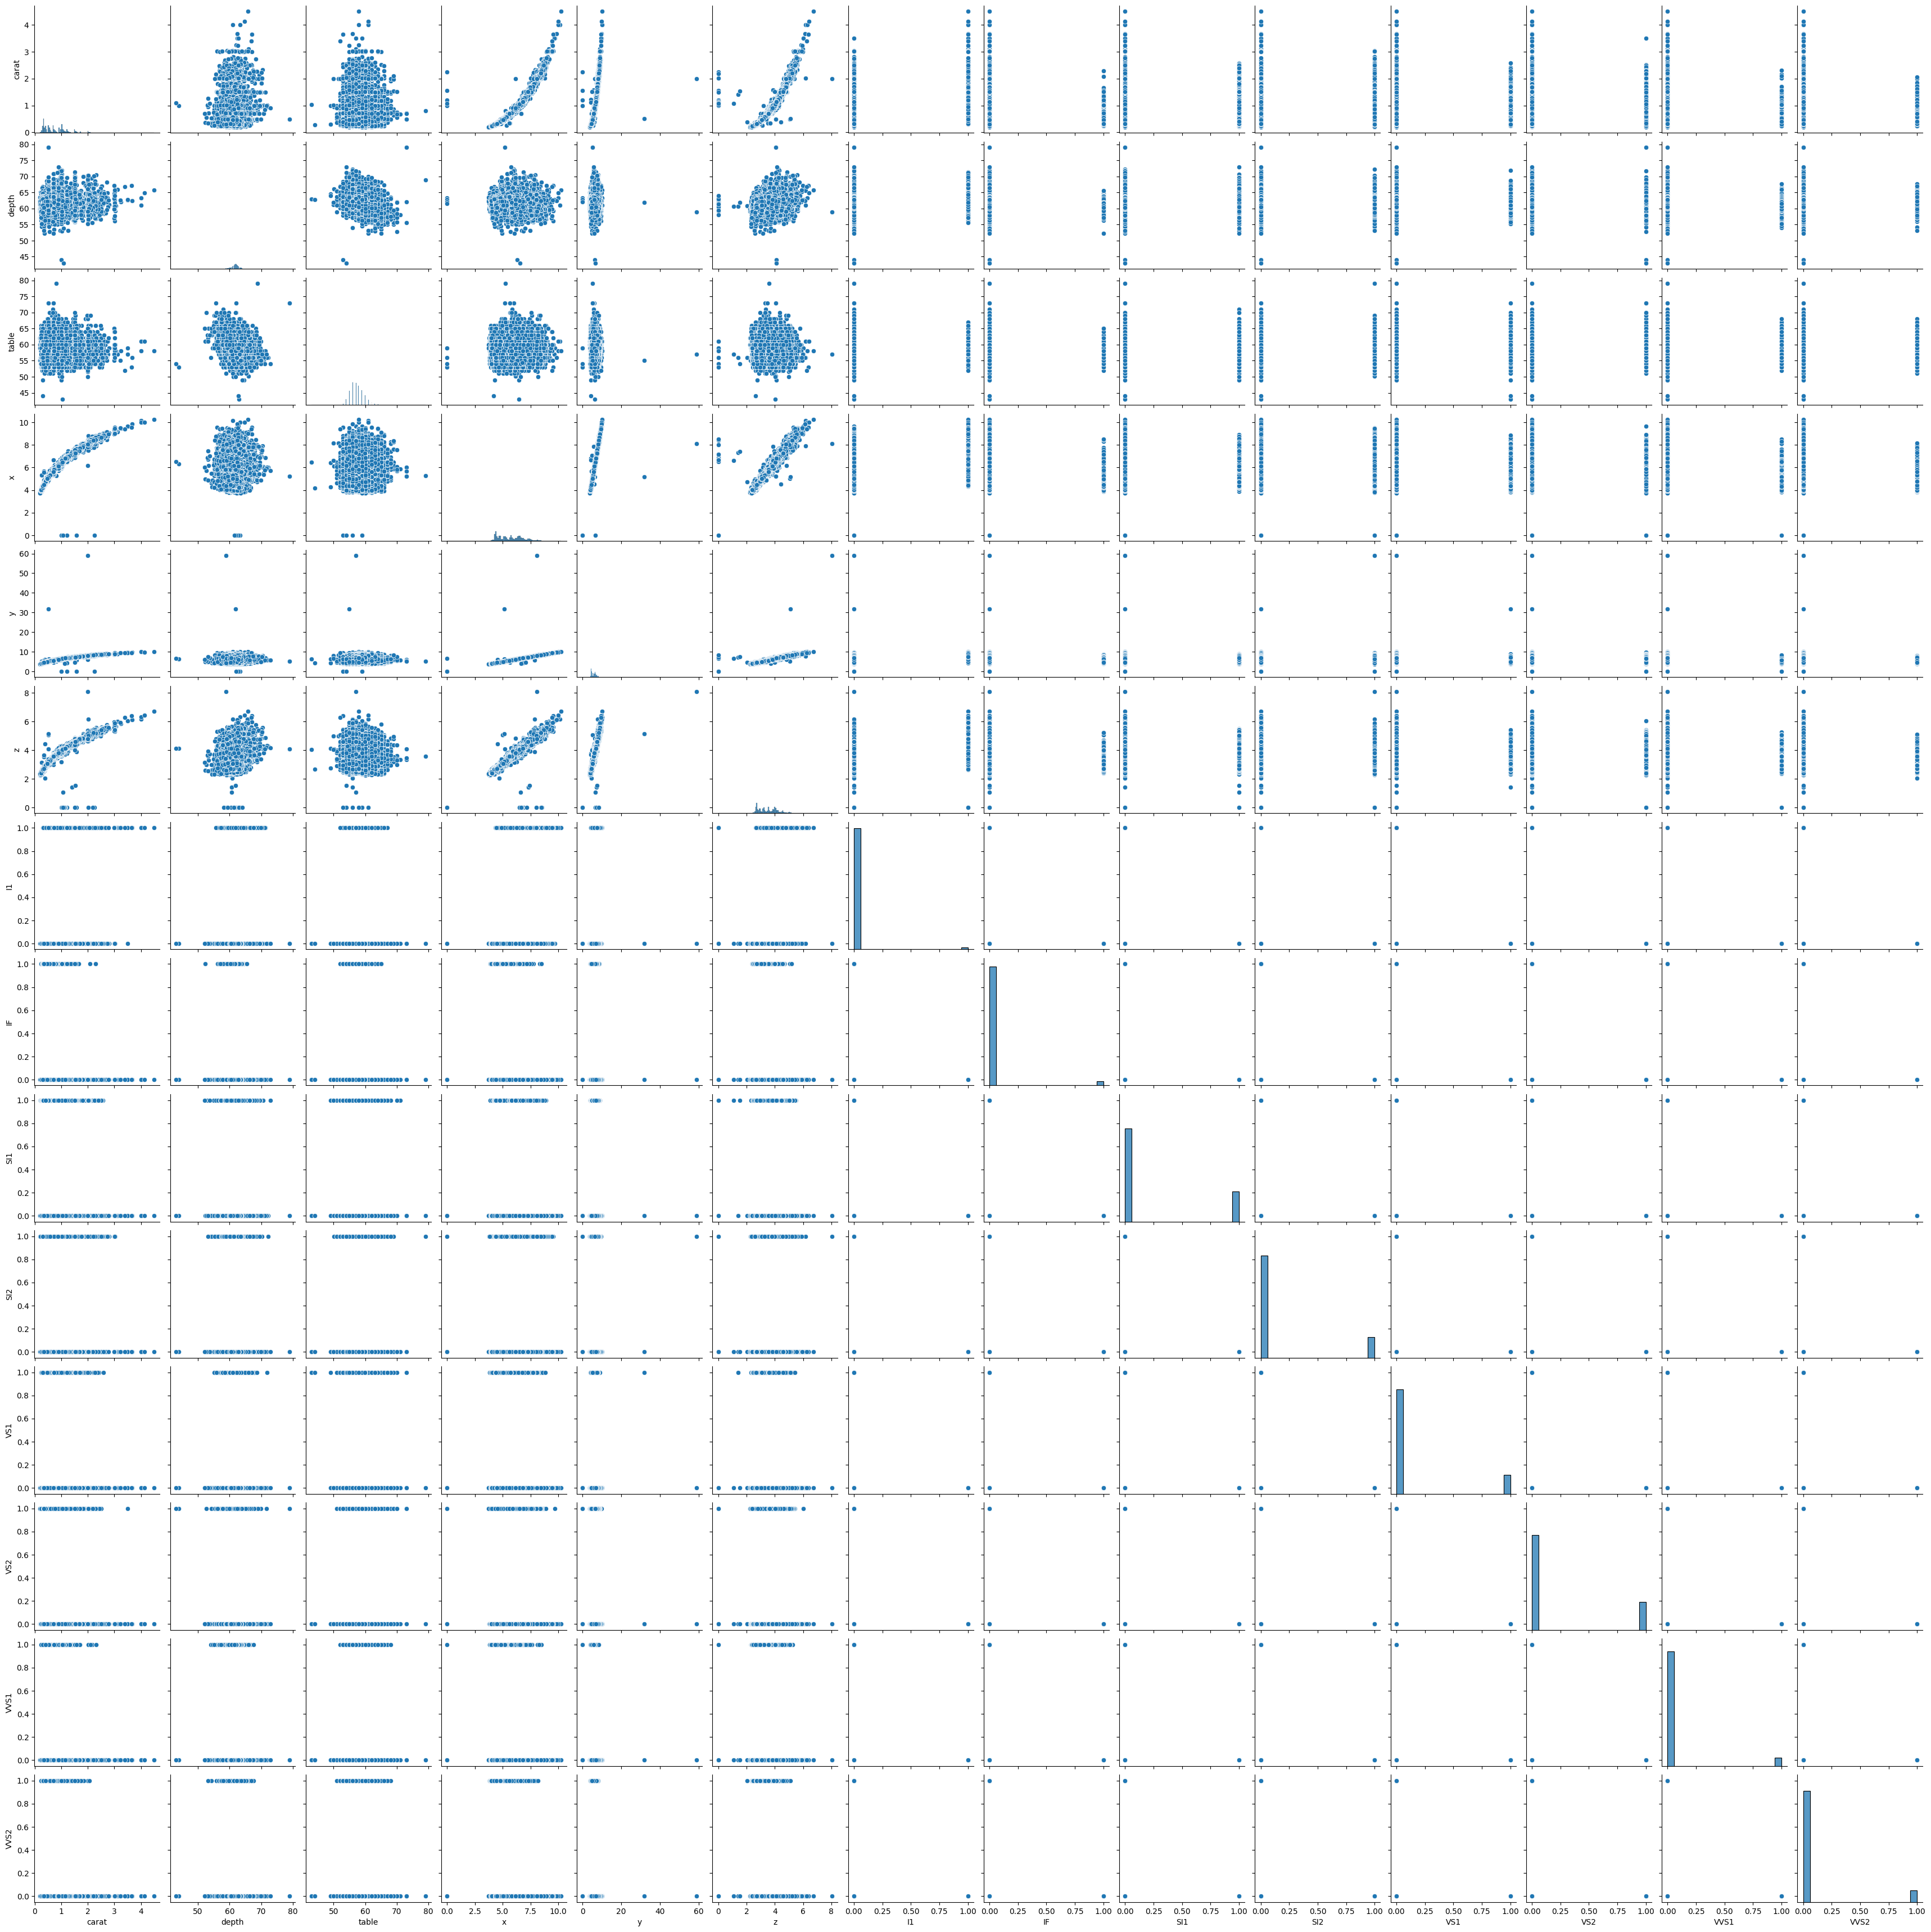

In [46]:
sns.pairplot(X_train);

In [47]:
X_train.corr()

,carat,depth,table,x,y,z,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
carat,1.000000,0.028054,0.179016,0.975429,0.946710,0.968144,0.124732,-0.112330,0.059236,0.268339,-0.061772,-0.038019,-0.166855,-0.136953
depth,0.028054,1.000000,-0.300327,-0.025632,-0.029838,0.096326,0.072004,-0.033802,0.042000,0.003505,-0.022669,-0.006203,-0.023834,-0.016670
table,0.179016,-0.300327,1.000000,0.194443,0.181657,0.152671,0.043167,-0.079693,0.049849,0.095974,-0.023643,-0.009462,-0.068263,-0.063005
x,0.975429,-0.025632,0.194443,1.000000,0.969037,0.985294,0.111254,-0.123330,0.076189,0.271692,-0.058201,-0.035265,-0.184521,-0.147257
y,0.946710,-0.029838,0.181657,0.969037,1.000000,0.961824,0.103195,-0.117498,0.072553,0.262991,-0.054457,-0.035754,-0.177643,-0.140988
z,0.968144,0.096326,0.152671,0.985294,0.961824,1.000000,0.114816,-0.124591,0.079557,0.267971,-0.059380,-0.035723,-0.184087,-0.146346
I1,0.124732,0.072004,0.043167,0.111254,0.103195,0.114816,1.000000,-0.021574,-0.066320,-0.052442,-0.049300,-0.063204,-0.031468,-0.037642
IF,-0.112330,-0.033802,-0.079693,-0.123330,-0.117498,-0.124591,-0.021574,1.000000,-0.105206,-0.083192,-0.078207,-0.100263,-0.049920,-0.059714
SI1,0.059236,0.042000,0.049849,0.076189,0.072553,0.079557,-0.066320,-0.105206,1.000000,-0.255743,-0.240417,-0.308222,-0.153459,-0.183568
SI2,0.268339,0.003505,0.095974,0.271692,0.262991,0.267971,-0.052442,-0.083192,-0.255743,1.000000,-0.190110,-0.243727,-0.121348,-0.145157


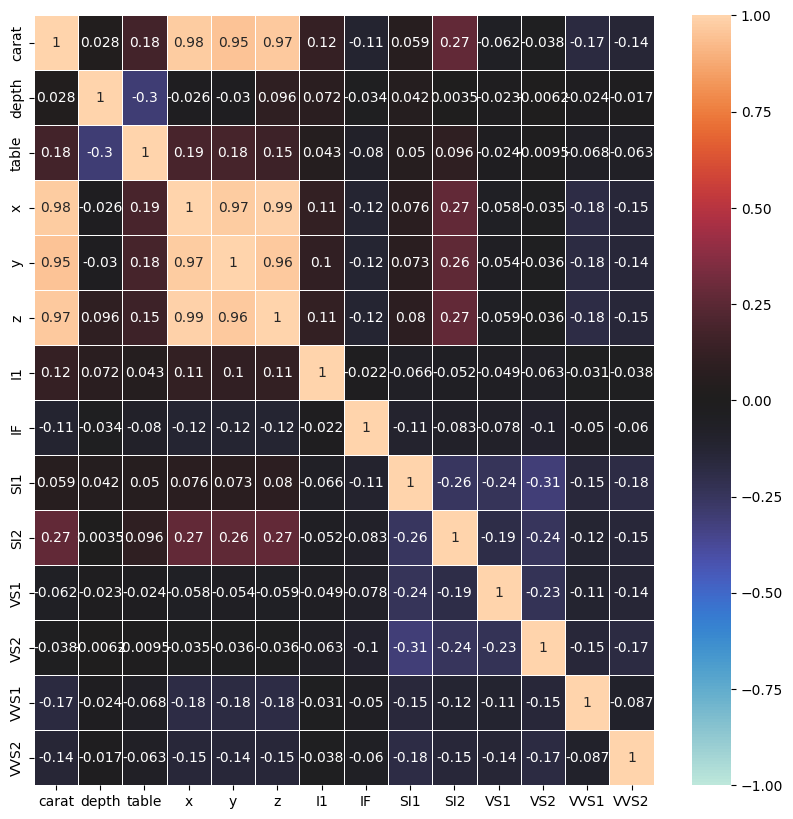

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(X_train.corr(),vmin=-1, vmax=1, center=0, annot=True, linewidths=.5);

### Intentemos otro modelo con menos variables

In [49]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (53943, 14)
Train features shape: (43154, 14)
Train target shape: (43154,)
Test features shape: (10789, 14)
Test target shape: (10789,)


In [50]:
train

,carat,cut,color,clarity,depth,table,price,x,y,z,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [51]:
X = train[['carat', 'depth', 'table', 'I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2']]

y = train['price']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

model = LinearRegression(n_jobs=-1) 
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print(predictions)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

[ 303.11480066 7808.33904939  448.0056543  ... 4255.92196757 -693.67011645
 8096.49261914]
MAE: 845.6121187805492
MSE: 1585835.4040994984
RMSE: 1259.2995688474996


In [52]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))/y.mean()

0.320209674702624

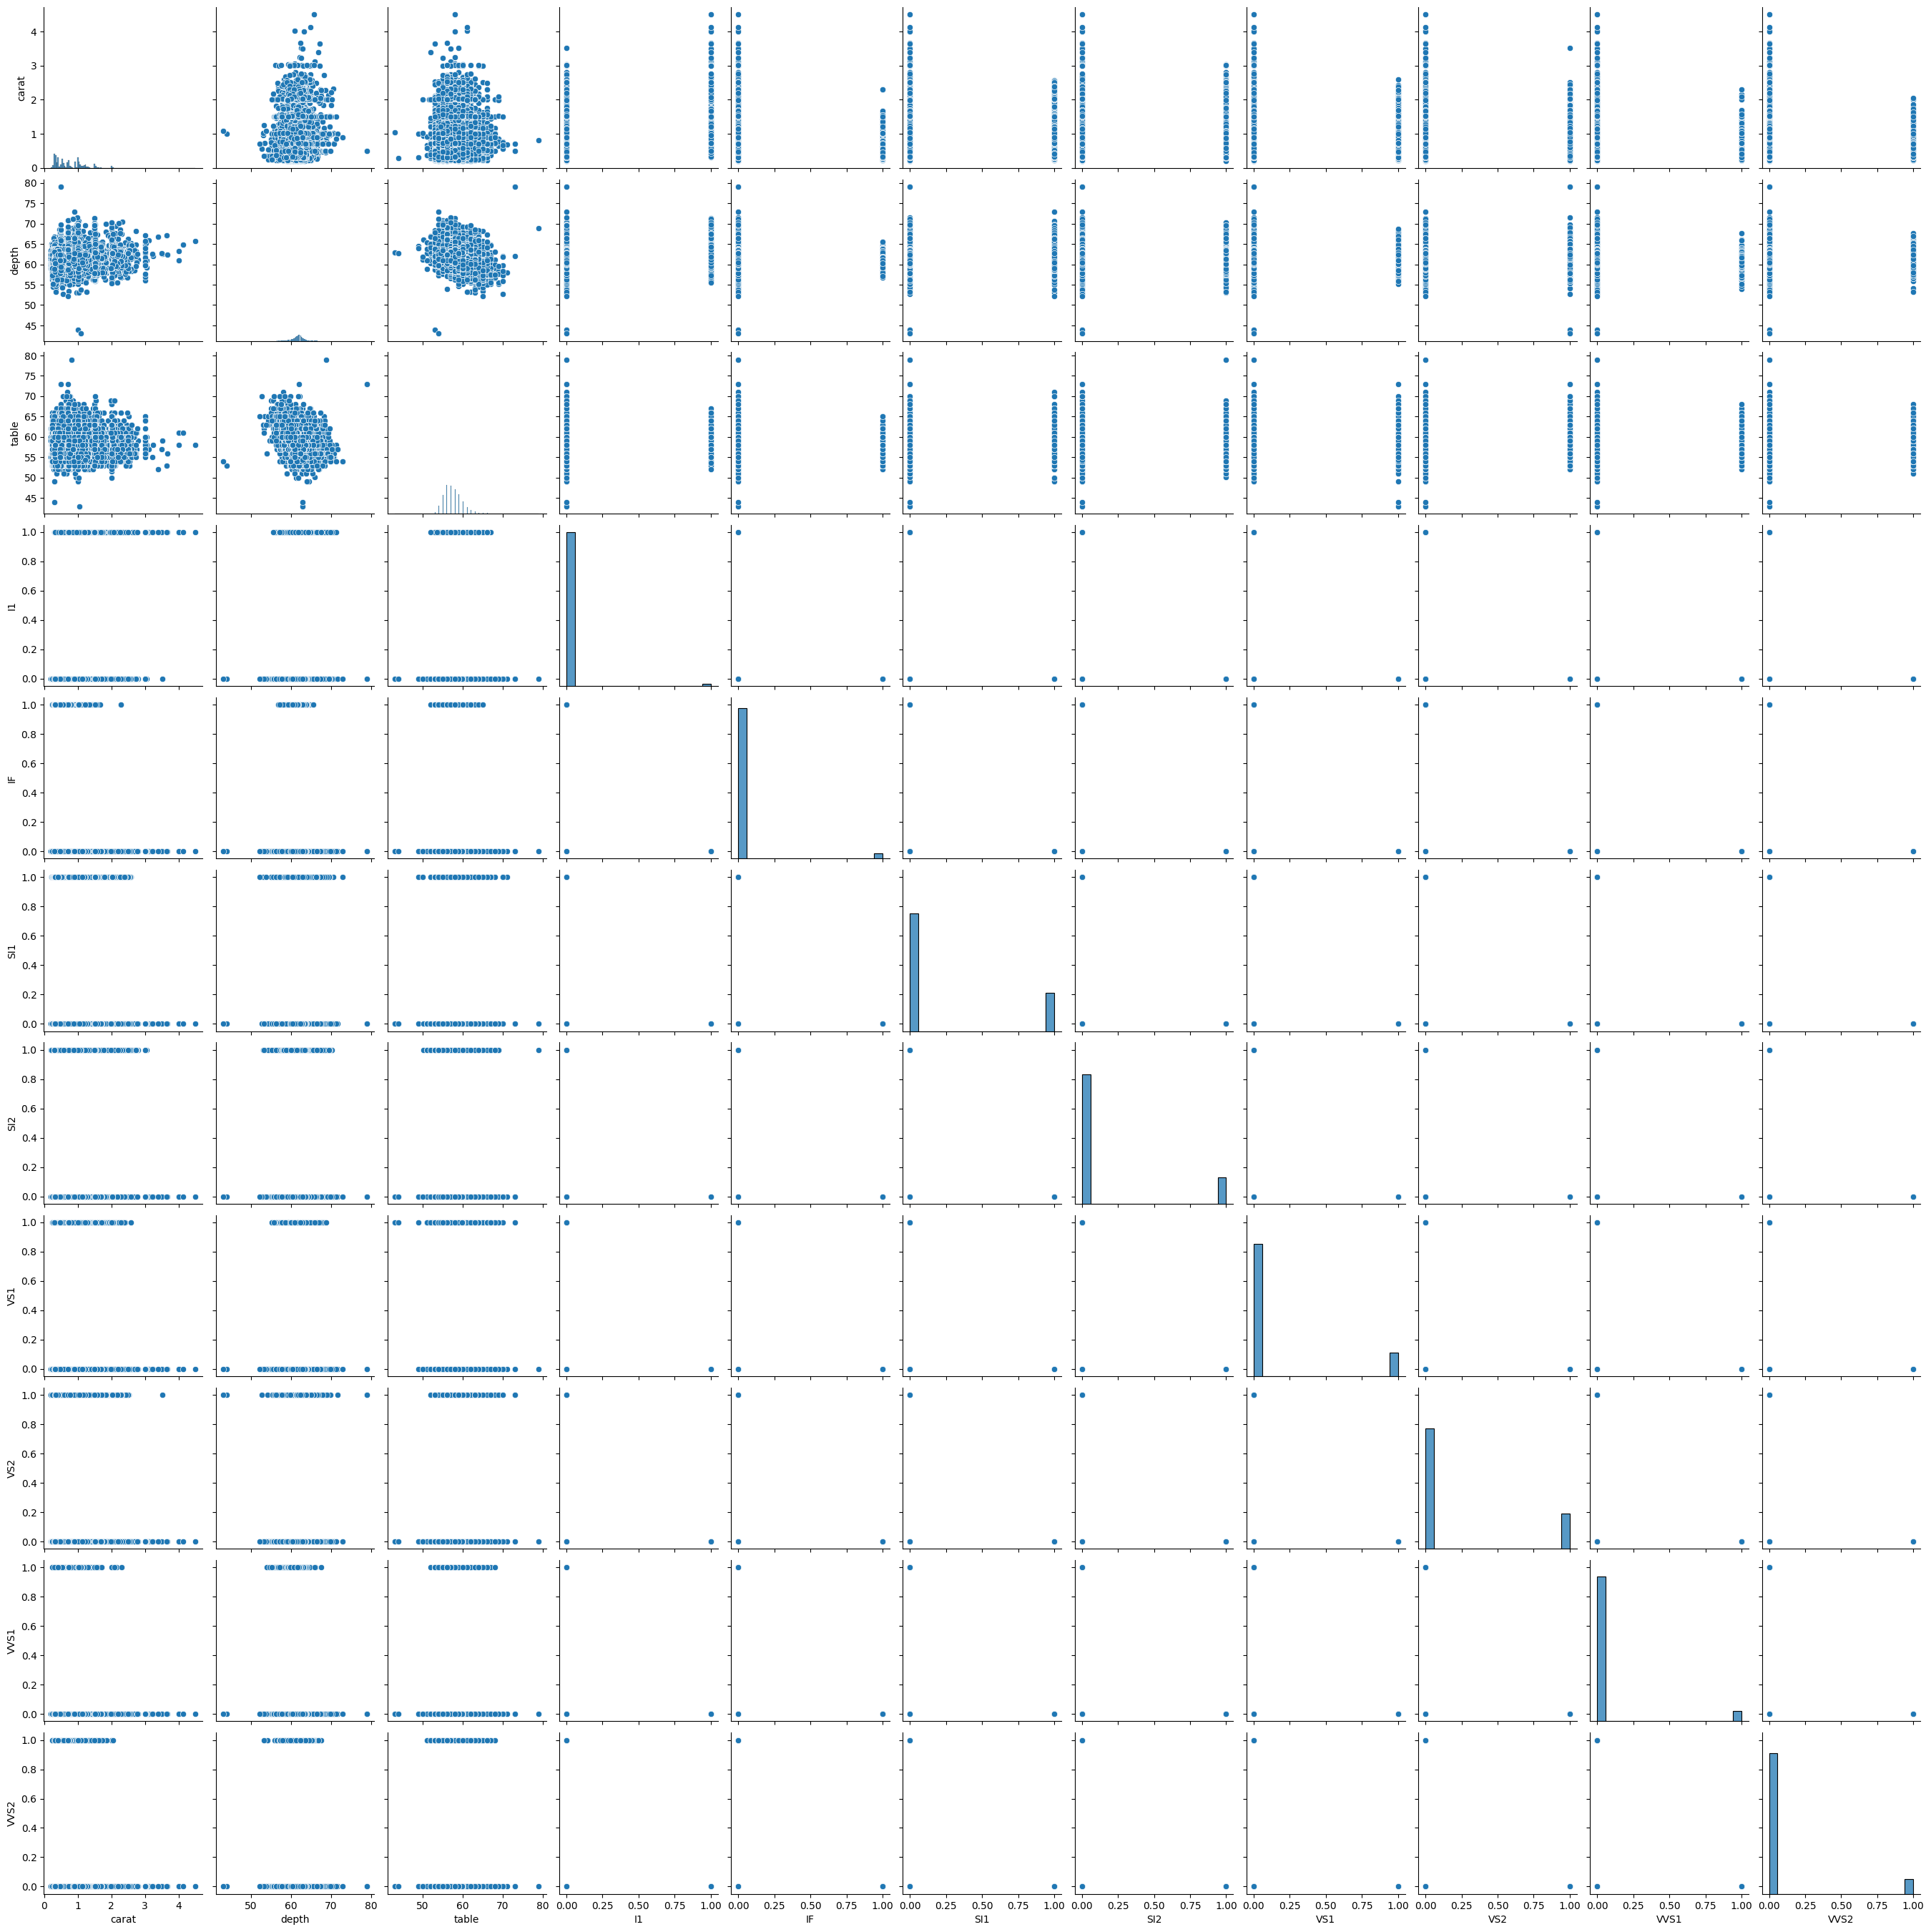

In [53]:
sns.pairplot(X_train);

In [54]:
intercept = model.intercept_
features = pd.DataFrame(model.coef_, X_train.columns, columns=['coefficient'])
features.head().sort_values('coefficient', ascending=False)

,coefficient
carat,8472.678292
IF,1561.089644
table,-57.197003
depth,-84.785717
I1,-3935.637433


In [55]:
coeff_df = pd.DataFrame(model.coef_,
                        X.columns,
                        columns=['Coefficient'])
coeff_df

,Coefficient
carat,8472.678292
depth,-84.785717
table,-57.197003
I1,-3935.637433
IF,1561.089644
SI1,-179.879294
SI2,-1021.299482
VS1,673.217223
VS2,465.837333
VVS1,1225.676459


In [56]:
train

,carat,cut,color,clarity,depth,table,price,x,y,z,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [57]:
import statsmodels.api as sm

In [58]:
X_train = train[['carat', 'depth', 'table', 'I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2']]
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=train["price"], exog=X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                 4.652e+04
Date:                Fri, 05 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:16:52   Log-Likelihood:            -4.6273e+05
No. Observations:               53943   AIC:                         9.255e+05
Df Residuals:                   53932   BIC:                         9.256e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4788.7318    296.947     16.127      0.0

In [59]:
X_train = train[['carat', 'I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2']]
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=train["price"], exog=X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 5.100e+04
Date:                Fri, 05 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:16:53   Log-Likelihood:            -4.6305e+05
No. Observations:               53943   AIC:                         9.261e+05
Df Residuals:                   53933   BIC:                         9.262e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.399e+14   5.71e+14      0.245      0.8

In [60]:
X_train = train[['carat', 'x', 'y', 'z', 'IF']]
X_test = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=train["price"], exog=X_train)
modelo = modelo.fit()
print(modelo.summary())
#Ver el notebook de Diamonds donde obtenemos un R2 mas bajo, porque alli si utilizamos cut y color.

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.927
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                          1.370e+05
Date:                Fri, 05 Jul 2024   Prob (F-statistic):                        0.00
Time:                        16:16:53   Log-Likelihood:                     -4.7152e+05
No. Observations:               53943   AIC:                                  9.430e+05
Df Residuals:                   53938   BIC:                                  9.431e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------